# Lecture 4.2: More about Exploratory Data Analysis

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* The covariation between two variables
* Case Studies on EDA
    
This lecture note corresponds to Chapter 7 of your book.
</div>


In [2]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## More about Histogram

Let us try to plot a histogram for the variable `dep_delay` in our flights data set. 

Warning message:
“Removed 8255 rows containing non-finite values (stat_bin).”


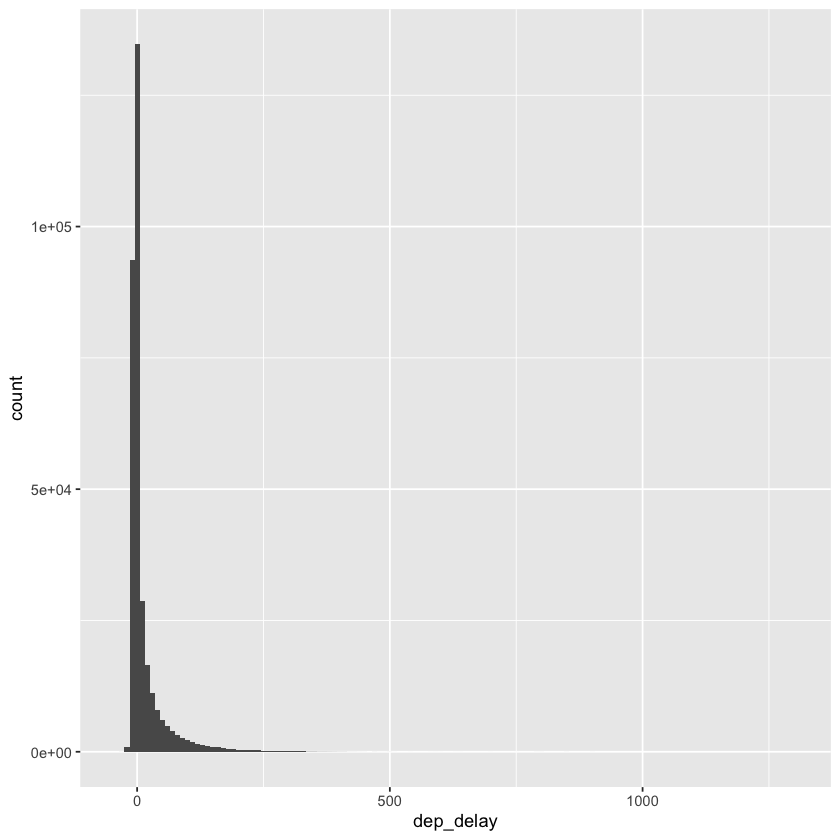

In [3]:
    ggplot(data = flights) +
        geom_histogram(mapping = aes(x = dep_delay), binwidth = 10)
# use na.rm = TRUE to suppress warning about missing values

It seems like there are 8255 rows that have missing values, so maybe let us try to remove those values first before we plot our histogram.  

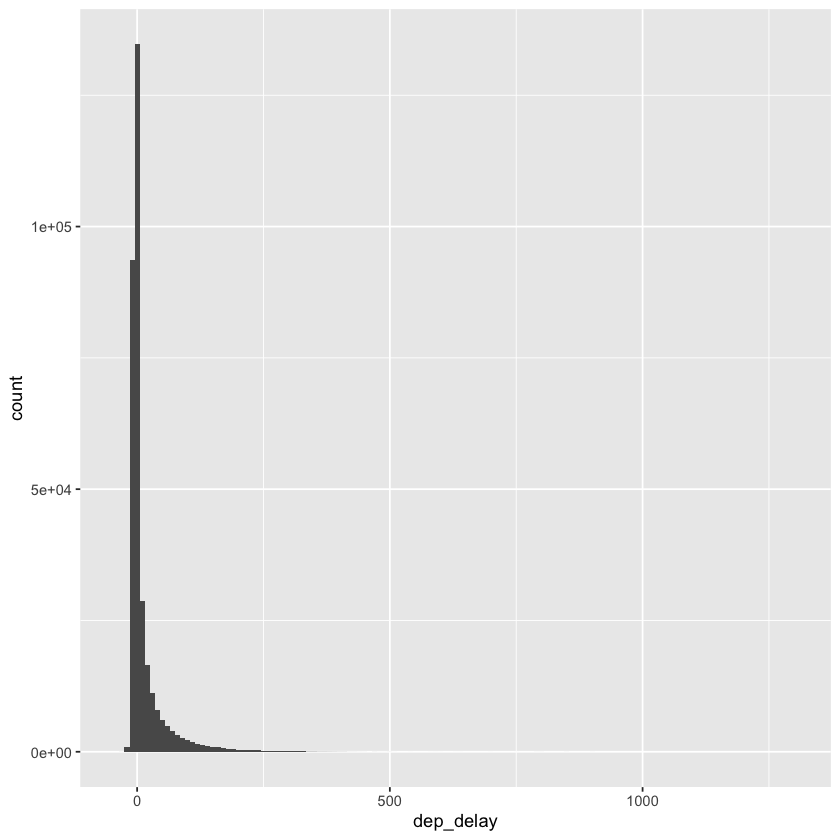

In [4]:
filter(flights, !is.na(dep_delay)) %>% 
            ggplot()  + geom_histogram(mapping = aes(x = dep_delay), binwidth = 10)

Since we have already manually removed all of the missing values, `ggplot` will not output a warning message for us now.

Let us zoom into the left part of the plot. Let us only look at flights with departure delays of less than an hour.

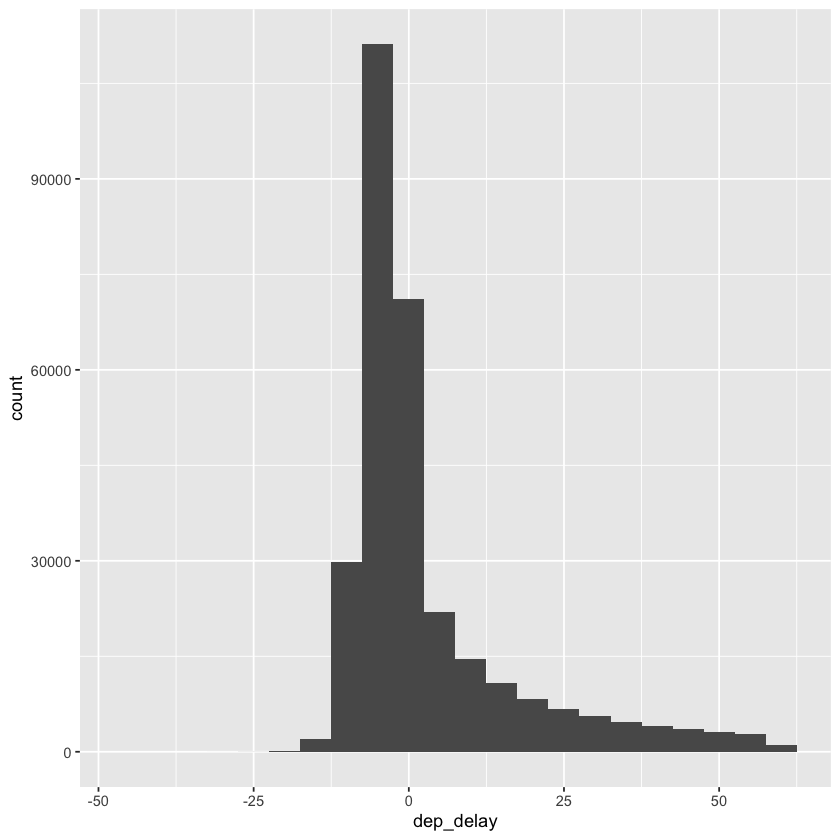

In [5]:
filter(flights, !is.na(dep_delay)) %>%
    filter(dep_delay < 60) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = dep_delay), binwidth = 5) 
# pick a smaller binwidth for better visualization

We can look at the underlying bins and their count by using the `cut_width` function in ggplot2.

In [6]:
filter(flights, !is.na(dep_delay)) %>%
    filter(dep_delay < 60) %>%
    count(cut_width(dep_delay, 5))

"cut_width(dep_delay, 5)",n
<fct>,<int>
"[-47.5,-42.5]",1
"(-37.5,-32.5]",1
"(-32.5,-27.5]",2
"(-27.5,-22.5]",14
"(-22.5,-17.5]",160
"(-17.5,-12.5]",2079
"(-12.5,-7.5]",29878
"(-7.5,-2.5]",111111
"(-2.5,2.5]",71126


The `cut_width` function basically shows you how many observations are within each bin with bin width equal to five.

#### Remark: 
The appearance of a histogram does depend on your choice of the bin width. It is a good idea to try several values to see if different choices reveal different patterns.

We can also bring in a third variable to our histogram just like we did for `geom_bar` and others.

Let us bring in the categorical variable **carrier** and map the color aesthetic to it.



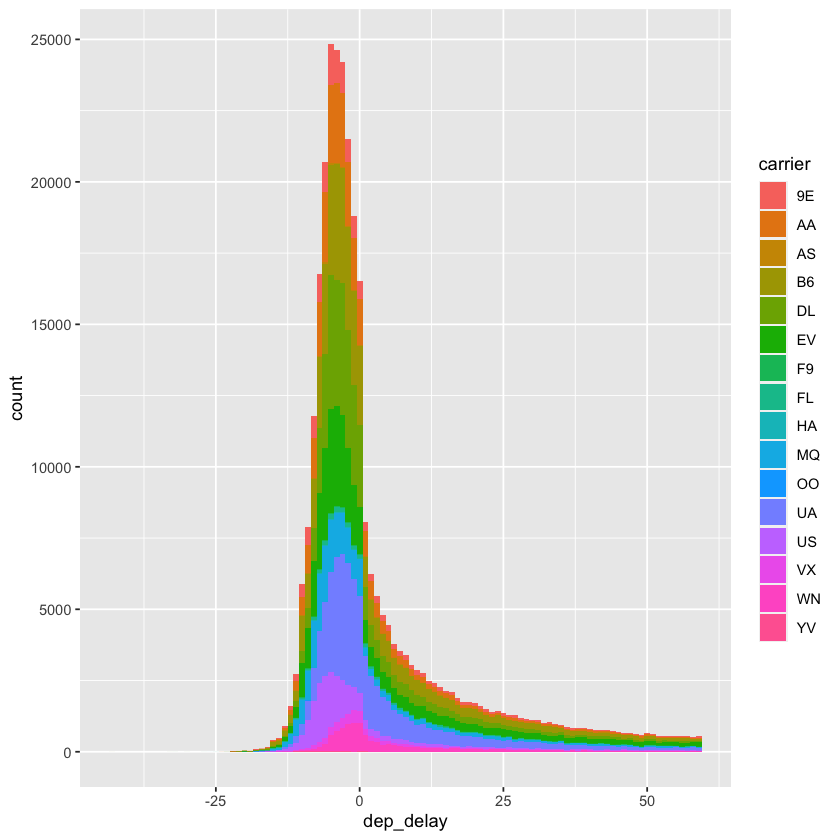

In [7]:
filter(flights, !is.na(dep_delay)) %>%
    filter(dep_delay < 60) %>%
        ggplot() +
            geom_histogram(mapping = aes(x = dep_delay, fill = carrier), binwidth = 1)

Oops! The legend is a bit crowded. Let us see who the major carriers are by number of flights.

Maybe let us just plot the historgam with the top 5 carriers. Let us find out which carriers are the top five carriers by using the tools that we have learnt so far.  

In [8]:
(top5 <- filter(flights, !is.na(dep_delay)) %>%
    group_by(carrier) %>%
    summarize(count = n()) %>%
    top_n(5, count) %>% # new function -- returns top 5 carriers ordered by count
    .[["carrier"]]) # new syntax -- extracts a column as an R vector

[1] "AA" "B6" "DL" "EV" "UA"

Now we can additionally filter out rows that do not belong to the top 5 carriers.

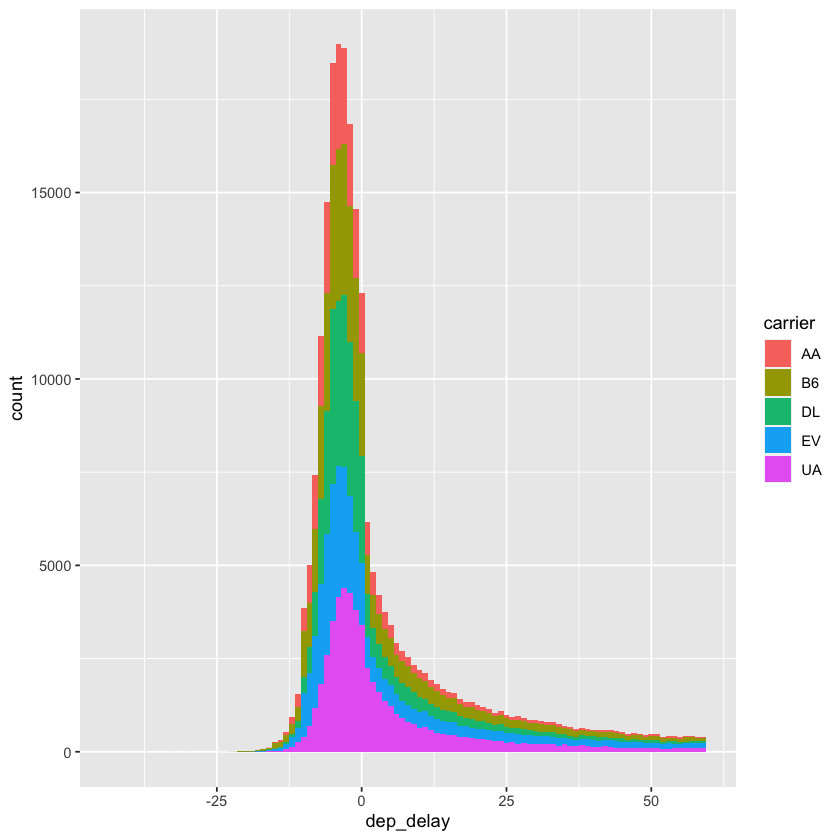

In [9]:
filter(flights, !is.na(dep_delay)) %>%
    filter(dep_delay < 60, carrier %in% top5) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = dep_delay, fill = carrier), binwidth = 1)

Hmmm... May be not a good idea to stick with histograms here. It is still too crowded and it is hard to see what is going on.  So let us a new geometry **freqpoly** which is like histogram but shows lines. Overlapping lines are easier to see than overlapping bars.

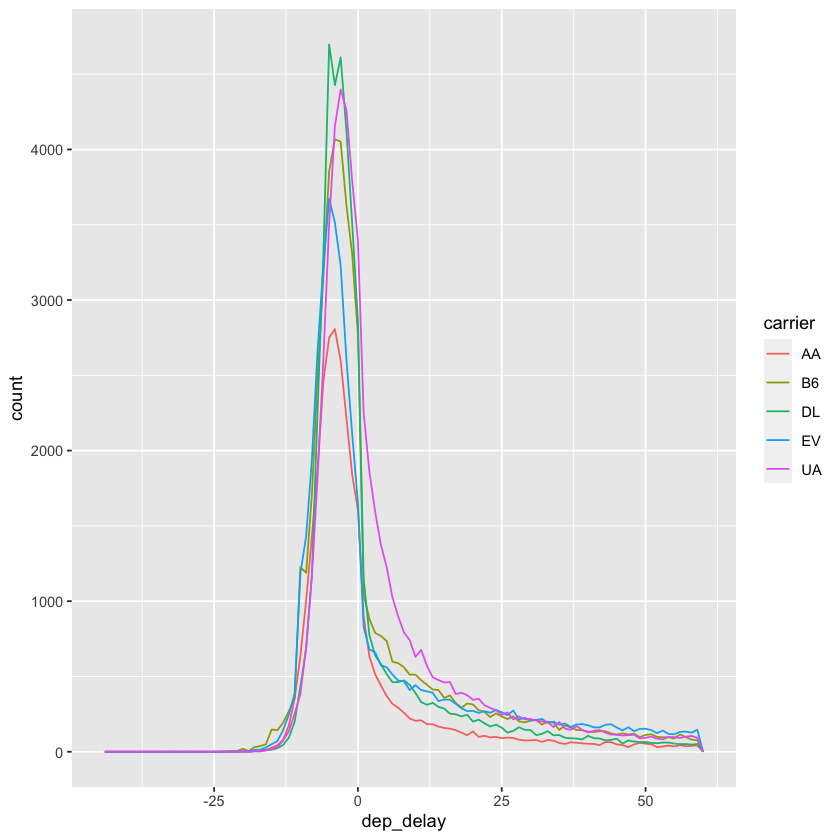

In [10]:
filter(flights, !is.na(dep_delay))  %>%
    filter(dep_delay < 60, carrier %in% top5) %>%
    ggplot() +
        geom_freqpoly(mapping = aes(x = dep_delay, color = carrier), binwidth = 1)

## Case Studies 

### Who is the greatest batter of all time?
The `Lahman` dataset contains information on baseball players.


In [11]:
install.packages("Lahman")


The downloaded binary packages are in
	/var/folders/0l/dj01tr0x49xbx9gr9y98rpj00000gn/T//Rtmpyhw2TV/downloaded_packages


In [12]:
library(Lahman)
bat <- as_tibble(Batting) %>% print

# A tibble: 108,789 × 22
   playerID  yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
   <chr>      <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
 1 abercda01   1871     1 TRO    NA        1     4     0     0     0     0     0
 2 addybo01    1871     1 RC1    NA       25   118    30    32     6     0     0
 3 allisar01   1871     1 CL1    NA       29   137    28    40     4     5     0
 4 allisdo01   1871     1 WS3    NA       27   133    28    44    10     2     2
 5 ansonca01   1871     1 RC1    NA       25   120    29    39    11     3     0
 6 armstbo01   1871     1 FW1    NA       12    49     9    11     2     1     0
 7 barkeal01   1871     1 RC1    NA        1     4     0     1     0     0     0
 8 barnero01   1871     1 BS1    NA       31   157    66    63    10     9     0
 9 barrebi01   1871     1 FW1    NA        1     5     1     1     1     0     0
10 barrofr01   1871     1 BS1    NA       18    86    13    13     2     1     0
# …

Each row of the above data is data per player and per year.  For instance, let's take a look at the second row of our data.

In [13]:
bat[2,] %>% print

# A tibble: 1 × 22
  playerID yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
  <chr>     <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
1 addybo01   1871     1 RC1    NA       25   118    30    32     6     0     0
# … with 10 more variables: RBI <int>, SB <int>, CS <int>, BB <int>, SO <int>,
#   IBB <int>, HBP <int>, SH <int>, SF <int>, GIDP <int>


Let's try to compute the career batting average for Bob Addy, defined as Hit/(Number of bats).  The playerID for Bob Addy is addybo01.  The variable for Hit is `H` and numner of bats is `AB`. 

In [14]:
filter(bat, playerID == "addybo01") %>% summarize(bat_average = sum(H)/sum(AB))   %>% print

# A tibble: 1 × 1
  bat_average
        <dbl>
1       0.277


In [16]:
filter(bat, playerID == "addybo01") %>% print

# A tibble: 7 × 22
  playerID yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
  <chr>     <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
1 addybo01   1871     1 RC1    NA       25   118    30    32     6     0     0
2 addybo01   1873     1 PH2    NA       10    51    12    16     1     0     0
3 addybo01   1873     2 BS1    NA       31   152    37    54     6     3     1
4 addybo01   1874     1 HR1    NA       50   213    25    51     9     2     0
5 addybo01   1875     1 PH2    NA       69   310    60    80     8     4     0
6 addybo01   1876     1 CHN    NL       32   142    36    40     4     1     0
7 addybo01   1877     1 CN1    NL       57   245    27    68     2     3     0
# … with 10 more variables: RBI <int>, SB <int>, CS <int>, BB <int>, SO <int>,
#   IBB <int>, HBP <int>, SH <int>, SF <int>, GIDP <int>


Bob Addy was active in the years 1871-1877. During that time he had $118+51+152+213+310+142+245=1231$ at-bats, and $32+16+54+51+80+40+68=341$ hits. Therefore his career batting average was $341/1241=0.277$.

### Exercise
By appropriately grouping and summarizing the data, add up all the hits and at-bats for each player across all the years they played, and compute their career batting average. 

Which player(s) has the highest career batting average?

In [17]:
## Solution
group_by(bat, playerID) %>% 
    summarise(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T),
              ) %>% 
    arrange(desc(bat_avg)) %>% print

# A tibble: 19,898 × 2
   playerID  bat_avg
   <chr>       <dbl>
 1 abramge01       1
 2 alanirj01       1
 3 alberan01       1
 4 banisje01       1
 5 bartocl01       1
 6 bassdo01        1
 7 birasst01       1
 8 bruneju01       1
 9 burnscb01       1
10 cammaer01       1
# … with 19,888 more rows


### Always include counts
It is a good idea to include counts of each group when you do a summary. Some groups may have very low numbers of observations, resulting in high variance for the summary statistics. 



In [18]:
## Solution
group_by(bat, playerID) %>% 
    summarise(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T),
totalAB = sum(AB, na.rm = T)) %>% 
    arrange(desc(bat_avg),desc(totalAB)) %>% print

# A tibble: 19,898 × 3
   playerID  bat_avg totalAB
   <chr>       <dbl>   <int>
 1 paciojo01       1       3
 2 birasst01       1       2
 3 devinha01       1       2
 4 hopkimi01       1       2
 5 kehnch01        1       2
 6 oconnfr01       1       2
 7 roachja01       1       2
 8 schemfr01       1       2
 9 sotogr01        1       2
10 tonkido01       1       2
# … with 19,888 more rows



What happens if we restrict our batting average calculation to players that had at least 100 at-bats, and sort it from players that have the highest batting average?

In [19]:
## Solution
group_by(bat, playerID) %>% 
    mutate(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T),
              total_AB = sum(AB, na.rm = T)) %>% 
    filter(total_AB > 100) %>% arrange(desc(bat_avg)) %>%  select(playerID, bat_avg, total_AB) %>% print

# A tibble: 77,183 × 3
# Groups:   playerID [9,062]
   playerID bat_avg total_AB
   <chr>      <dbl>    <int>
 1 cobbty01   0.366    11436
 2 cobbty01   0.366    11436
 3 cobbty01   0.366    11436
 4 cobbty01   0.366    11436
 5 cobbty01   0.366    11436
 6 cobbty01   0.366    11436
 7 cobbty01   0.366    11436
 8 cobbty01   0.366    11436
 9 cobbty01   0.366    11436
10 cobbty01   0.366    11436
# … with 77,173 more rows


What is wrong with the above?  Why are there so many overlapping rows for the player cobbty01? 

In [20]:
## Solution
group_by(bat, playerID) %>% 
    summarize(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T),
              total_AB = sum(AB, na.rm = T)) %>% 
    filter(total_AB > 100) %>% arrange(desc(bat_avg)) %>%  print

# A tibble: 9,062 × 3
   playerID  bat_avg total_AB
   <chr>       <dbl>    <int>
 1 cobbty01    0.366    11436
 2 barnero01   0.360     2391
 3 hornsro01   0.358     8173
 4 jacksjo01   0.356     4981
 5 meyerle01   0.356     1443
 6 kingst01    0.353      272
 7 odoulle01   0.349     3264
 8 nicolge01   0.347      147
 9 delahed01   0.346     7510
10 mcveyca01   0.346     2513
# … with 9,052 more rows


### Exercise
Output all the years in which the batting average for those years for cobbty01 is less than his bat_avg across all years. That is, we are interested in knowing which year cobbty01 underperform.    

In [22]:
bat %>% filter(playerID=="cobbty01") %>% 
mutate(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T), bat_avg_year = H/AB) %>%
filter(bat_avg_year < bat_avg) %>% print

# A tibble: 10 × 24
   playerID yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
   <chr>     <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
 1 cobbty01   1905     1 DET    AL       41   151    19    36     6     0     1
 2 cobbty01   1906     1 DET    AL       98   358    45   113    15     5     1
 3 cobbty01   1907     1 DET    AL      150   605    99   212    28    14     5
 4 cobbty01   1908     1 DET    AL      150   580    88   188    36    20     4
 5 cobbty01   1920     1 DET    AL      112   428    86   143    28     8     2
 6 cobbty01   1923     1 DET    AL      145   556   103   189    40     7     6
 7 cobbty01   1924     1 DET    AL      155   625   115   211    38    10     4
 8 cobbty01   1926     1 DET    AL       79   233    48    79    18     5     4
 9 cobbty01   1927     1 PHA    AL      134   490   104   175    32     7     5
10 cobbty01   1928     1 PHA    AL       95   353    54   114    27     4     1
# … with 12 more var

## Exercise
Now output all rows for each player that underperform, that is, their bat_avg_year is less than bat_avg.

That is, we are interested in knowing whether there is any specific year that the players underperform. 

In [24]:
group_by(bat,playerID) %>% filter(AB !=0 && H !=0) %>%
mutate(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T), bat_avg_year = H/AB) %>% arrange(playerID) %>%
filter(bat_avg_year < bat_avg) %>% print

# A tibble: 37,557 × 24
# Groups:   playerID [9,468]
   playerID  yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
   <chr>      <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
 1 aaronha01   1954     1 ML1    NL      122   468    58   131    27     6    13
 2 aaronha01   1960     1 ML1    NL      153   590   102   172    20    11    40
 3 aaronha01   1966     1 ATL    NL      158   603   117   168    23     1    44
 4 aaronha01   1968     1 ATL    NL      160   606    84   174    33     4    29
 5 aaronha01   1969     1 ATL    NL      147   547   100   164    30     3    44
 6 aaronha01   1970     1 ATL    NL      150   516   103   154    26     1    38
 7 aaronha01   1972     1 ATL    NL      129   449    75   119    10     0    34
 8 aaronha01   1973     1 ATL    NL      120   392    84   118    12     1    40
 9 aaronha01   1974     1 ATL    NL      112   340    47    91    16     0    20
10 aaronha01   1975     1 ML4    AL      137   465    45

## Exercise
Write code to find the player with the highest bat_avg for each team. You may find the function `slice_max` useful.

In [29]:
group_by(bat,teamID,playerID) %>% filter(AB !=0 && H !=0) %>% mutate(total_AB = sum(AB,na.rm = T)) %>% 
filter(total_AB > 100) %>% summarize(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T)) %>% 
arrange(teamID,desc(bat_avg),playerID) %>% slice_max(1) %>% print()

`summarise()` has grouped output by 'teamID'. You can override using the `.groups` argument.



# A tibble: 140 × 3
# Groups:   teamID [140]
   teamID playerID  bat_avg
   <fct>  <chr>       <dbl>
 1 ALT    smithge01   0.315
 2 ANA    guerrvl01   0.337
 3 ARI    segurje01   0.319
 4 ATL    ozunama01   0.338
 5 BAL    iglesjo01   0.373
 6 BFN    broutda01   0.351
 7 BFP    hoydu01     0.298
 8 BL1    forceda01   0.384
 9 BL2    rayir01     0.340
10 BL3    vanhage01   0.318
# … with 130 more rows


## Names of baseball players

Let us think more about names. Naming frequencies change a lot over time. There are 19617 baseball players in this data set. How have their names changed over time?

We are going to extract the first name and last name in our data set `Lahman::Master` by linking the playerID.

In [30]:
players <- as_tibble(Lahman::Master) %>% 
    select(nameFirst, nameLast, nameGiven) %>% print

# A tibble: 20,093 × 3
   nameFirst nameLast    nameGiven       
   <chr>     <chr>       <chr>           
 1 David     Aardsma     David Allan     
 2 Hank      Aaron       Henry Louis     
 3 Tommie    Aaron       Tommie Lee      
 4 Don       Aase        Donald William  
 5 Andy      Abad        Fausto Andres   
 6 Fernando  Abad        Fernando Antonio
 7 John      Abadie      John W.         
 8 Ed        Abbaticchio Edward James    
 9 Bert      Abbey       Bert Wood       
10 Charlie   Abbey       Charles S.      
# … with 20,083 more rows


## Exercise
What were the top five most common first names for players born before 1900? After 1980?

In [31]:
## Solution
filter(Master, birthYear < 1900) %>% as_tibble %>% count(nameFirst) %>%arrange(desc(n)) %>% slice(1:5)

filter(Master, birthYear >1980) %>% as_tibble %>% count(nameFirst) %>%arrange(desc(n)) %>% slice(1:5)



nameFirst,n
<chr>,<int>
Bill,289
John,218
George,186
Ed,159
Charlie,157


nameFirst,n
<chr>,<int>
Matt,68
Chris,63
Ryan,60
Josh,56
Jose,53


One thing we notice is that there are a lot of nicknames. It might make more sense to look at the "given name", which is usually the first and middle names. To do this, we will need to split up these names. There is a built-in command for doing this in R:

In [32]:
players_given <- separate(players, nameGiven, into = c("givenFirst", "rest")) %>% print

Warning message:
“Expected 2 pieces. Additional pieces discarded in 1268 rows [7, 10, 39, 84, 136, 148, 163, 193, 219, 252, 259, 263, 276, 300, 305, 307, 331, 333, 352, 430, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1750 rows [44, 52, 54, 76, 126, 131, 151, 152, 154, 168, 170, 171, 172, 173, 174, 184, 185, 191, 192, 199, ...].”


# A tibble: 20,093 × 4
   nameFirst nameLast    givenFirst rest   
   <chr>     <chr>       <chr>      <chr>  
 1 David     Aardsma     David      Allan  
 2 Hank      Aaron       Henry      Louis  
 3 Tommie    Aaron       Tommie     Lee    
 4 Don       Aase        Donald     William
 5 Andy      Abad        Fausto     Andres 
 6 Fernando  Abad        Fernando   Antonio
 7 John      Abadie      John       W      
 8 Ed        Abbaticchio Edward     James  
 9 Bert      Abbey       Bert       Wood   
10 Charlie   Abbey       Charles    S      
# … with 20,083 more rows


## Exercise
What were the top five most common first names for players born before 1900? After 1980?

In [33]:
filter(Master, birthYear < 1900) %>% as_tibble %>% separate(nameGiven, into = c("givenFirst", "rest")) %>% 
count(givenFirst) %>%arrange(desc(n))  %>% slice(1:10)

filter(Master, birthYear < 1900) %>% as_tibble %>% count(nameFirst) %>%arrange(desc(n)) %>% slice(1:10)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 782 rows [1, 4, 18, 31, 59, 62, 70, 73, 93, 102, 106, 113, 124, 126, 128, 143, 153, 162, 167, 171, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 434 rows [12, 40, 45, 48, 58, 67, 71, 90, 103, 108, 138, 146, 147, 149, 157, 160, 193, 198, 199, 214, ...].”


givenFirst,n
<chr>,<int>
John,499
William,478
Charles,272
James,261
George,254
Edward,165
Thomas,158
Joseph,154
Frank,136


nameFirst,n
<chr>,<int>
Bill,289
John,218
George,186
Ed,159
Charlie,157
Frank,157
Jack,151
Joe,149
Harry,134


## Finding distinct values

Here's an example: I want to know how many distinct values are there? The `n_distinct()` function takes a vector of values, and returns the number of distinct values:

In [34]:
n_distinct(c("Michigan", "Ohio", "STATS 306", "Michigan"))

[1] 3

## Exercise
How many distinct names were there among players born before 1900? After 1980?

In [35]:
## Solution
Master %>% filter(birthYear < 1910) %>% select(nameFirst) %>% n_distinct()

[1] 1080

Are there more or less unique names now than there were in the past? Let's consider the number of distinct names seen in each year:

Adding missing grouping variables: `birthYear`

Warning message:
“Removed 1 rows containing missing values (geom_point).”


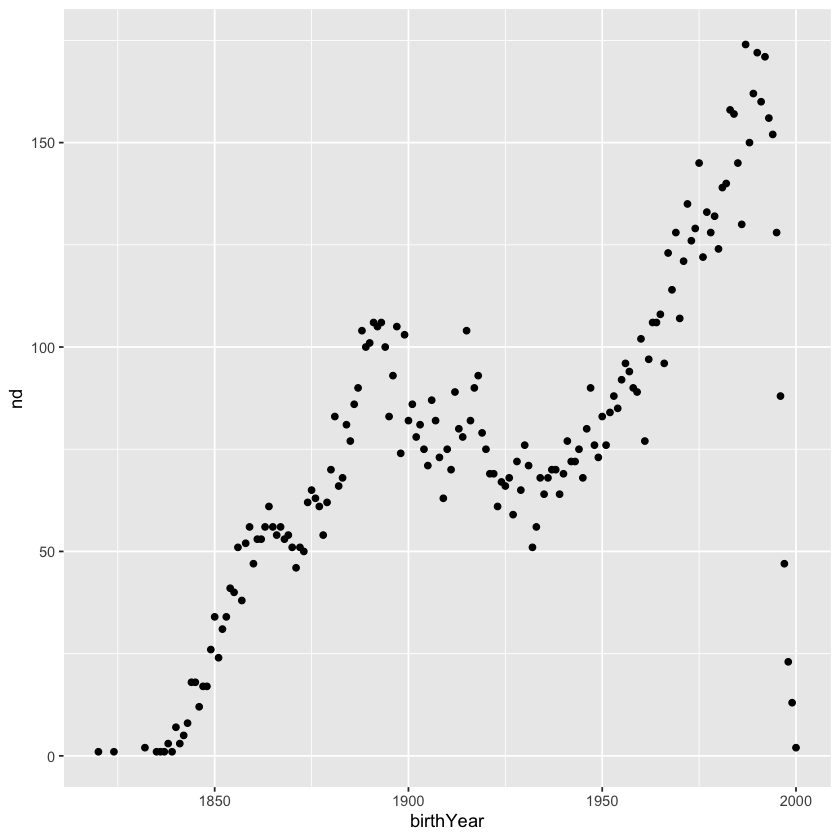

In [36]:
Master %>% group_by(birthYear) %>% select(nameFirst) %>%
summarize(nd = n_distinct(nameFirst))  %>% ggplot() + geom_point(aes(x = birthYear, y=nd))

